In [2]:
import pandas as pd
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
import requests
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64
from io import BytesIO



### DEPENDENCIES

In [ ]:
#!pip install selenium
#!pip install playwright
#!pip install scrapy
#!pip install opencv-python

### Function to download and display an image from a URL

In [6]:
def display_image_from_url(image_url):
    # Send a GET request to download the image
    response = requests.get(image_url)

    # Convert the content of the response into a numpy array
    image_array = np.array(bytearray(response.content), dtype=np.uint8)

    # Decode the image into an OpenCV format
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Display the image in an OpenCV window
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

    # Wait indefinitely until a key is pressed, then close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### SCRAPING USING SELENIUM
BeautifulSoup is used for parsing HTML or XML documents and is great for scraping static websites.


Title: Nike C1TY “Surplus”, Price: $100


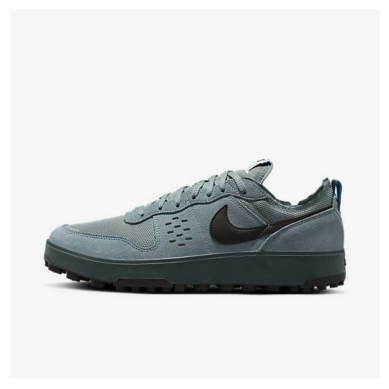

Title: Nike Dunk Low Retro, Price: $115


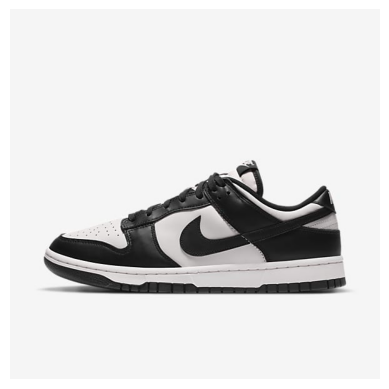

Title: Nike Dunk Low Retro SE, Price: $125


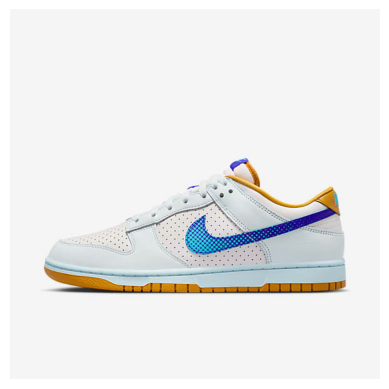

Title: Nike Air Force 1 '07 LV8, Price: $120


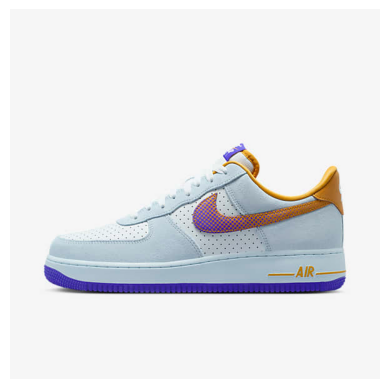

Title: Nike Air Force 1 '07 WB, Price: $130


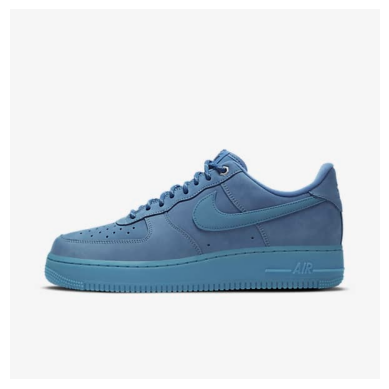

Title: Nike Dunk Low Retro SE, Price: $125


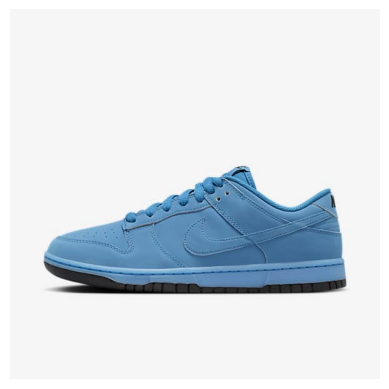

Title: Ja 2, Price: $120


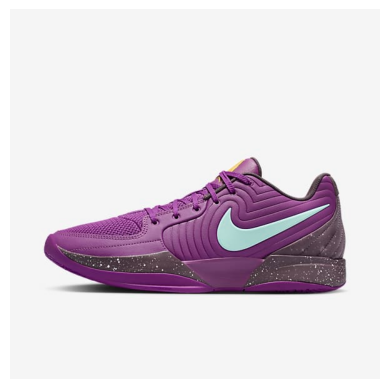

Title: Book 1 "Sunrise", Price: $140


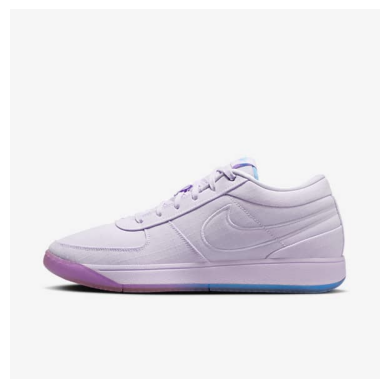

Title: Nike Dunk Low Retro, Price: $120


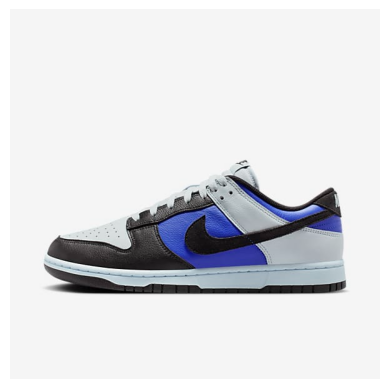

Title: Nike Air Force 1 '07 LV8, Price: $120


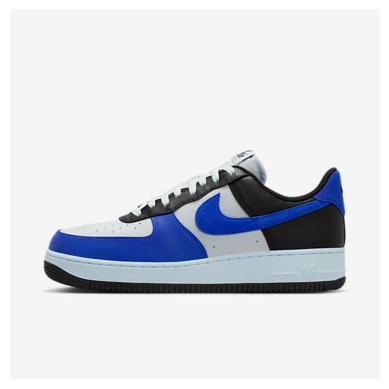

Title: KD17, Price: $150


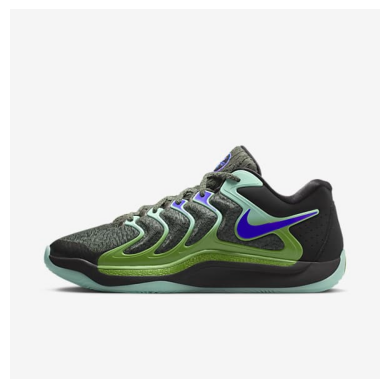

Title: Tatum 3 "Welcome to the Garden", Price: $125


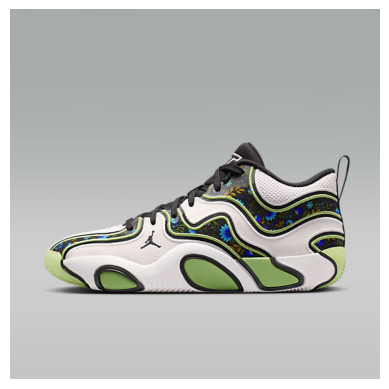

Title: Nike Air Max Dn, Price: $160


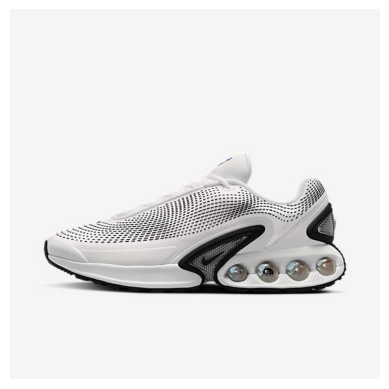

Title: Nike Air Pegasus 2005, Price: $150


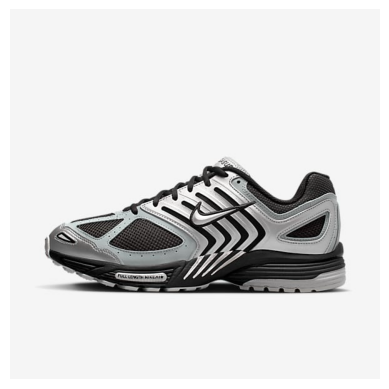

Title: Giannis Immortality 4 "Halloween", Price: $85


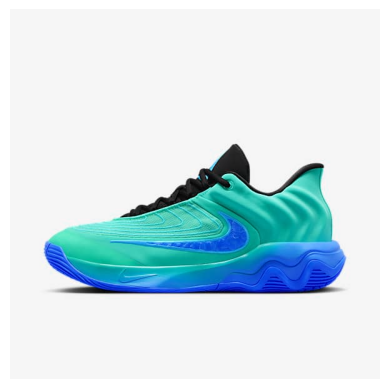

Title: LeBron XXII "Crown Jewel", Price: $180


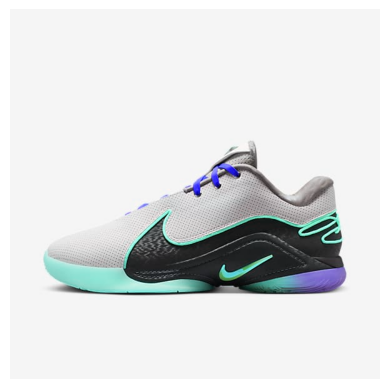

Title: Nike Pegasus 41 GORE-TEX, Price: $160


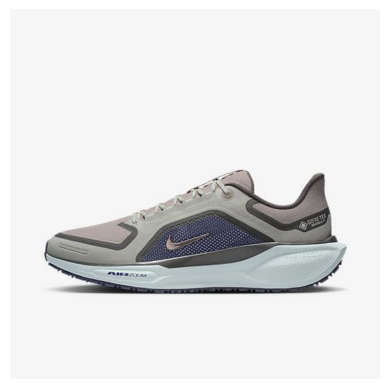

Title: Nike InfinityRN 4 GORE-TEX, Price: $180


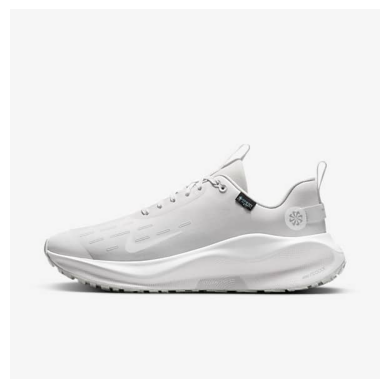

Title: Nike Winflo 11 GORE-TEX, Price: $130


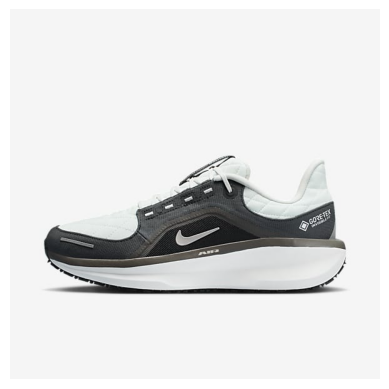

Title: Nike Pegasus Plus, Price: $180


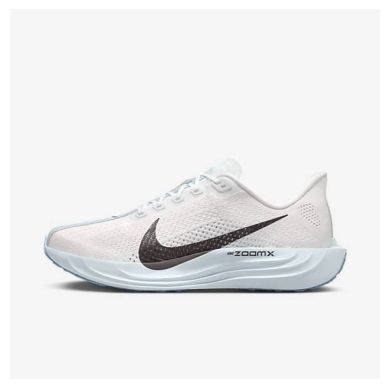

Title: Nike Cortez Leather, Price: $90


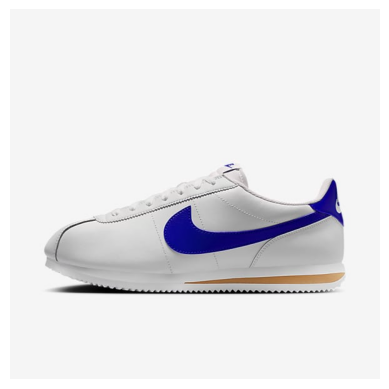

Title: Nike Killshot 2 Leather, Price: $100


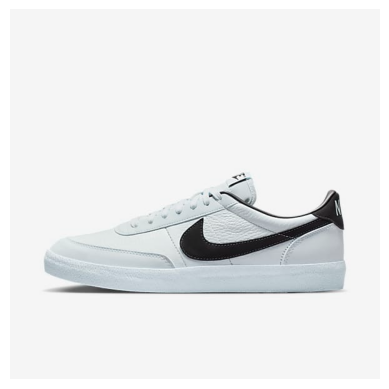

Title: Sabrina 2, Price: $130


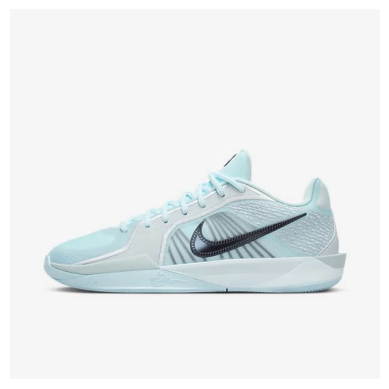

Title: Nike Free Metcon 6, Price: $120


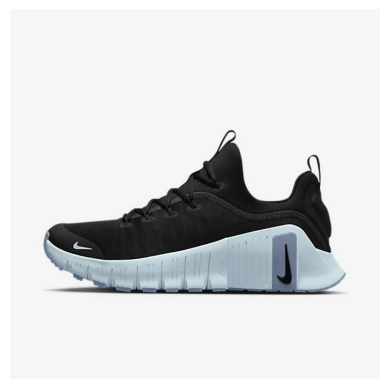

In [7]:
# Initialize the browser driver (Ensure you have ChromeDriver installed)
driver = webdriver.Chrome()
# Visit the Nike men's shoes page
driver.get('https://www.nike.com/w/mens-shoes-nik1zy7ok')

# Allow some time for the page to load
time.sleep(5)

# Extract product containers
products = driver.find_elements(By.CSS_SELECTOR, '.product-card')

for product in products:
    title = product.find_element(By.CSS_SELECTOR, 'div.product-card__title').text
    price = product.find_element(By.CSS_SELECTOR, 'div.product-price').text

    
    image = product.find_element(By.CSS_SELECTOR, 'img').get_attribute('src')
    
    print(f"Title: {title}, Price: {price}")
    display_image_from_url(image)
    

# Close the browser
driver.quit()


### SCRAPING USING BEAUTIFUL SOUP
Selenium is more suitable for dynamic content, often rendered by JavaScript. For sites like Nike, Selenium can automate the browser.


In [16]:




# Send request to the Nike men's shoes page
url = 'https://www.nike.com/w/mens-shoes-nik1zy7ok'
response = requests.get(url)

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Attempt to find the product details (if rendered in HTML response)
products = soup.find_all('div', class_='product-card')

for product in products:
    title = product.find('div', class_='product-card__title')
    price = product.find('div', class_='product-price')
    image = product.find('img')  # Find the img tag

    # Extract text and image source if found
    title_text = title.text if title else 'No title available'
    price_text = price.text if price else 'No price available'
    image_url = image.get('src') if image else 'No image available'
    print(f"Title: {title_text}, Price: {price_text}, Image: {image_url}")


Title: Nike C1TY “Surplus”, Price: $100, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Nike Dunk Low Retro, Price: $115, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Nike Dunk Low Retro SE, Price: $125, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Nike Air Force 1 '07 LV8, Price: $120, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Nike Air Force 1 '07 WB, Price: $130, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Nike Dunk Low Retro SE, Price: $125, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Ja 2, Price: $120, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
Title: Book 1 "Sunrise", Price: $140, Image: data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAAB

### FIRECRAWL SCRAPING
FireCrawl would hypothetically be based on an LLM to handle complex websites. This might simulate crawling and scraping based on AI predictions of content structure. However, this is a fictional approach, so I’ll use an example where a basic LLM is applied for content extraction.

In [ ]:
# Assuming a function in FireCrawl that auto-learns the schema of a webpage
from firecrawl import FireCrawl

url = 'https://www.nike.com/w/mens-shoes-nik1zy7ok'
crawler = FireCrawl(url)

# Auto extract schema-based content (e.g., titles, prices)
data = crawler.extract_content(schema='Product')
for product in data:
    print(product['title'], product['price'])

### PLAYWRIGHT SCRAPING
Playwright is another library for web automation and scraping, handling JavaScript-heavy websites like Zara.

In [ ]:
import asyncio
from playwright.async_api import async_playwright

async def scrape_nike():
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        
        # Visit the Nike Men's Shoes page
        await page.goto('https://www.nike.com/w/mens-shoes-nik1zy7ok')
        
        # Extract product titles using CSS selectors
        products = await page.query_selector_all('h3.product-title')
        
        for product in products:
            title = await product.inner_text()
            print(title)
        
        await browser.close()

# Run the async function
asyncio.run(scrape_nike())

### ScrapeGraphAI (LLM-based)
ScrapeGraphAI could be an advanced LLM-based scraping method to handle multi-page scraping tasks. Again, this is a conceptual tool, so an example might involve combining LLM reasoning with scraping.

In [ ]:
# Hypothetical example using an LLM-based tool for multi-page scraping
from scrapegraphai import ScrapeGraphAI

# URL for Nike products
url = 'https://www.nike.com/w/mens-shoes-nik1zy7ok'

# Initialize the ScrapeGraphAI for advanced LLM-based scraping
scraper = ScrapeGraphAI(url)

# Scrape multi-page data from the website
data = scraper.multi_page_scrape(pages=5)  # scrape 5 pages

for product in data:
    print(product['title'], product['price'], product['rating'])
